In [161]:
import os
import geopandas as gpd
import numpy as np
import shapely
from shapely.geometry import Polygon, Point
from shapely.ops import unary_union
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import sqrt
import json
from shapely.plotting import plot_polygon, plot_line

In [162]:
S_U = "U"

In [163]:
boundary_path = os.path.join(S_U + "_boundaries.gpkg")
road_path = os.path.join(S_U + "_road_segments.gpkg")
intersection_path = os.path.join(S_U + "_intersections.gpkg")
lane_group_path = os.path.join(S_U + "_lane_groups_polygons.gpkg")
lane_path = os.path.join(S_U + "_lanes_polygons.gpkg")
road_segment_path= os.path.join(S_U + "_road_segments.gpkg")

In [107]:

boundary_df = gpd.read_file(boundary_path)
road_df = gpd.read_file(road_path)
road_polygon = unary_union(road_df.geometry)
intersection_df = gpd.read_file(intersection_path)
intersection_polygon = unary_union(intersection_df.geometry)
lane_group_df = gpd.read_file(lane_group_path)
lane_group_polygons = [Polygon(geom) for geom in lane_group_df.geometry]
lane_df = gpd.read_file(lane_path)
lane_polygons = [Polygon(geom) for geom in lane_df.geometry]
road_segment_df = gpd.read_file(road_segment_path)

In [164]:
lane = lane_df.geometry[0]

In [165]:
len(boundary_df)

500

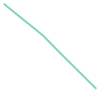

In [206]:
boundary_df.geometry[0]

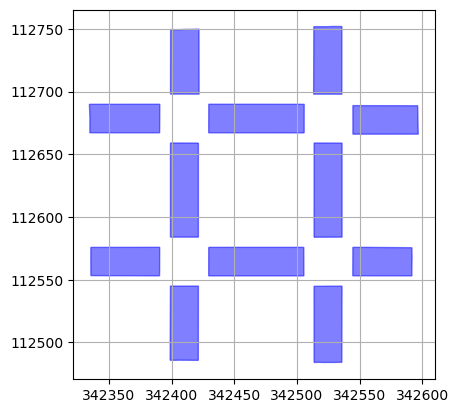

In [167]:
#plot each road segment
for i, row in road_segment_df.iterrows():
    road_segment_polygon = row.geometry
    plot_polygon(road_segment_polygon, color='blue', alpha=0.5, add_points=False) # random color

plt.show()

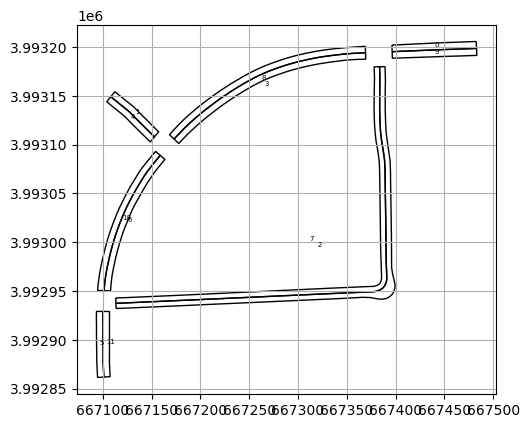

In [94]:
#plot each lane polygon
for i, lane in enumerate(lane_polygons):
    plot_polygon(lane, edgecolor='black', facecolor='none', linewidth=1, add_points=False)
    plt.text(lane.centroid.x, lane.centroid.y, str(i), fontsize=5)
    #print(lane.exterior.coords[0] == (lane.exterior.coords[-1]))

In [8]:
lane.exterior.coords.xy

(array('d', [667106.81442902, 667106.782460145, 667106.7904930871, 667106.7818722881, 667106.7974593173, 667106.7944968058, 667106.7778574158, 667106.6808630307, 667106.658812795, 667106.6815103042, 667106.7803957516, 667106.9217354794, 667107.3436891579, 667107.4307138252, 667101.0044430697, 667100.6081484881, 667100.2664387935, 667100.2495005575, 667100.235321902, 667100.2292229523, 667100.2813292539, 667100.24650873, 667100.1479832552, 667100.1381110231, 667100.0744566291, 667100.1430365931, 667106.81442902]),
 array('d', [3992928.894419425, 3992919.4838836435, 3992916.6869973806, 3992914.961239604, 3992909.7885143203, 3992897.8671857123, 3992878.941674936, 3992878.879673335, 3992878.649924599, 3992877.657855153, 3992875.6409008135, 3992872.9818845433, 3992863.9889311036, 3992862.1342049222, 3992861.719311439, 3992869.646714421, 3992877.1352099567, 3992877.5758263045, 3992878.0165414596, 3992878.457062031, 3992878.8713653, 3992886.367523717, 3992900.036554917, 3992913.706292714, 399

True
True
True
True
True
True


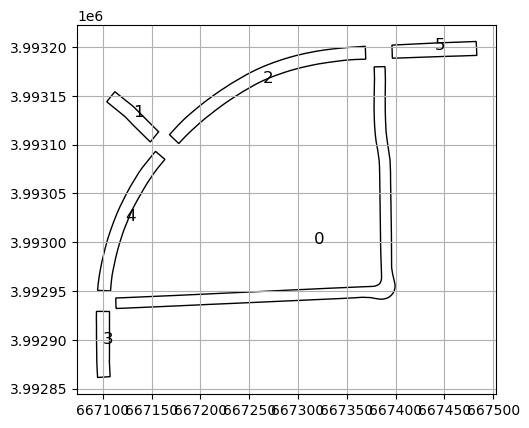

In [9]:
#plot each lane polygon
road_polygons = [Polygon(geom) for geom in road_segment_df.geometry]
for i, lane in enumerate(road_polygons):
    plot_polygon(lane, edgecolor='black', facecolor='none', linewidth=1, add_points=False)
    plt.text(lane.centroid.x, lane.centroid.y, str(i), fontsize=12)
    print(road_polygons[i].exterior.coords[0] == (road_polygons[i].exterior.coords[-1]))

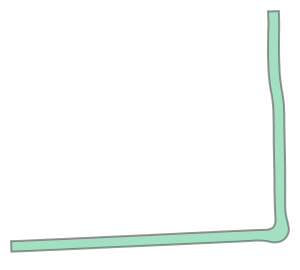

In [10]:
road = road_polygons[0]
road

In [11]:
b = boundary_df.geometry[2]

In [12]:
road.contains(b)

True

In [28]:
boundary_polygon.coords[1]

(667148.6803091483, 3993102.558196474)

In [ ]:
S_main_lane_boundaries = {0: (7, 0, -1), 1: (11, 0, 1), 2: (14, 1, -1), 3: (15, 1, 1), 4: (6, 2, -1), 5: (8, 2, 1), 6: (16, 3, 1), 7: (9, 3, -1), 8: (17, 4, 1), 9: (12, 4, -1), 10: (10, 5, -1), 11: (13, 5, 1)}



In [96]:
main_lanes = boundary_df.geometry[0:18]
connecting_lanes = boundary_df.geometry[18:]

In [136]:
a = {1:"a", 4:"d"}
b = {2:"b", 3:"c"}
a.update(b)
a

{1: 'a', 4: 'd', 2: 'b', 3: 'c'}

In [148]:
len(boundary_df)

126

In [149]:
126 - 108

18

In [153]:
num = 0
for i, row in boundary_df.iterrows():
    if i > 17:
        continue
    
    bound = row.geometry
    for j, row2 in boundary_df.iterrows():
        if j <= 17:
            continue
        
        bound2 = row2.geometry
        if bound.intersects(bound2):
            num += 1

print(num)

216


6


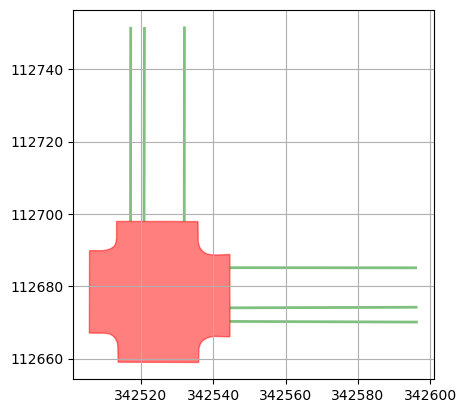

In [114]:
num = 0
for i, row in intersection_df.iterrows():
    if i != 1:
        continue
    intersection_polygon = row.geometry
    plot_polygon(intersection_polygon, color='red', alpha=0.5, add_points=False)  # random color
    for j, boundary in boundary_df.iterrows():
        if j > 18:
            continue
        boundary_polygon = boundary.geometry
        if intersection_polygon.intersects(boundary_polygon):
            num += 1
            plot_line(boundary_polygon, color='green', alpha=0.5, add_points=False)
print(num)

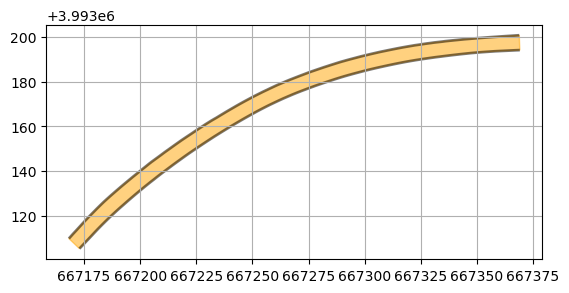

In [164]:
for i, row in lane_group_df.iterrows():
    lane_group_polygon = row.geometry
    if i == 0 :
        plot_polygon(lane_group_polygon, color='orange', alpha=0.5, add_points=False)  # random color
        for j, boundary in boundary_df.iterrows():
            if j > 17:
                continue
            boundary_polygon = boundary.geometry
            if lane_group_polygon.intersects(boundary_polygon):
                plot_line(boundary_polygon, color='black', alpha=0.5, add_points=False)


In [165]:
footprint = [
    [342552.7557, 112668.3227],
    [342552.7654, 112668.5168],
    [342552.791, 112668.7338],
    [342552.8176, 112668.8731],
    [342552.85, 112668.9762],
    [342552.8951, 112669.0525],
    [342552.9599, 112669.1114],
    [342553.2227, 112669.2523],
    [342553.2882, 112669.2718],
    [342555.3163, 112669.2629],
    [342555.2887, 112669.3785],
    [342555.3391, 112669.3775],
    [342555.4063, 112669.2626],
    [342556.552, 112669.2592],
    [342556.6167, 112669.2392],
    [342556.8156, 112669.107],
    [342556.8671, 112669.0591],
    [342556.9121, 112668.9967],
    [342556.9335, 112668.9623],
    [342556.9498, 112668.9278],
    [342556.988, 112668.844],
    [342557.0379, 112668.7135],
    [342557.0603, 112668.6187],
    [342557.0858, 112668.4712],
    [342557.0983, 112668.3062],
    [342557.0845, 112668.1411],
    [342557.0579, 112667.9939],
    [342557.0348, 112667.8992],
    [342556.9839, 112667.769],
    [342556.945, 112667.6856],
    [342556.9285, 112667.6512],
    [342556.9068, 112667.6169],
    [342556.8613, 112667.555],
    [342556.8095, 112667.5074],
    [342556.6096, 112667.3767],
    [342556.5447, 112667.3572],
    [342555.399, 112667.3626],
    [342555.3309, 112667.2482],
    [342555.2805, 112667.2475],
    [342555.309, 112667.3629],
    [342553.2809, 112667.3695],
    [342553.2156, 112667.3895],
    [342552.9538, 112667.5325],
    [342552.8895, 112667.5918],
    [342552.845, 112667.6684],
    [342552.8134, 112667.7718],
    [342552.7878, 112667.9113],
    [342552.764, 112668.1285],
    [342552.7557, 112668.3227]
  ]

0 7
1 14
2 9
3 5
4 15
6 8
10 12
11 13
16 17
18 20
19 23
21 22


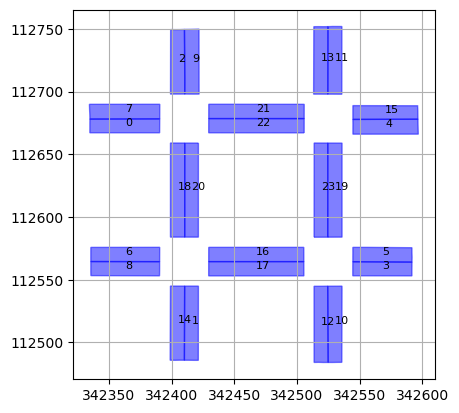

In [171]:
for i, row in lane_group_df.iterrows():
    lane_group_polygon = row.geometry
    plot_polygon(lane_group_polygon, color='blue', alpha=0.5, add_points=False)  # random color

    for j, row2 in lane_group_df[i+1:].iterrows():
        if i == j:
            continue
        lane_group_polygon2 = row2.geometry
        if lane_group_polygon.intersects(lane_group_polygon2):
            print(i, j)
            plt.text(lane_group_polygon.centroid.x, lane_group_polygon.centroid.y, str(i), fontsize=8)
            plt.text(lane_group_polygon2.centroid.x, lane_group_polygon2.centroid.y, str(j), fontsize=8)

In [49]:
125 - 90 + 1

36

In [ ]:

U_max = 83
U_connecting_lane_max = 307

In [370]:
len(boundary_df)

500

left edge endpoint: POINT (342531.9507885081 112697.8829223361)
right edge endpoint: POINT (342535.7567497499 112697.8627178391)
left edge startpoint: POINT (342544.5664518111 112685.1274585398)
right edge startpoint: POINT (342544.5785546294 112688.7769099363)





In [386]:
my_ls = shapely.LineString([(342524.59072333697, 112697.90468889909), (342524.5932410344, 112697.69611927772), (342524.5985135273, 112697.4675317007), (342524.6063650262, 112697.23901623352), (342524.6167945671, 112697.01060198934), (342524.6298008742, 112696.78231805573), (342524.64538232645, 112696.55419349292), (342524.66353699396, 112696.32625734466), (342524.68426259863, 112696.09853863866), (342524.7075565509, 112695.8710663792), (342524.733415924, 112695.64386953063), (342524.7618374715, 112695.41697703033), (342524.7928176237, 112695.19041774774), (342524.826352463, 112694.96422054806), (342524.8624377741, 112694.73841425165), (342524.9010690022, 112694.51302760515), (342524.942241275, 112694.28808932168), (342524.98594938905, 112694.06362802724), (342525.0321878236, 112693.83967231496), (342525.08095073525, 112693.61625072142), (342525.1322319547, 112693.39339168882), (342525.18602499564, 112693.17112360934), (342525.24232305156, 112692.94947479715), (342525.3011189989, 112692.72847348115), (342525.3624053912, 112692.50814779713), (342525.42617446464, 112692.28852583164), (342525.49241815275, 112692.06963553456), (342525.5611280517, 112691.85150479496), (342525.63229545474, 112691.63416142248), (342525.7059113493, 112691.41763307313), (342525.78196639416, 112691.20194734486), (342525.86045095633, 112690.98713171034), (342525.94135507464, 112690.77321353188), (342526.0246684958, 112690.56022007187), (342526.1103806495, 112690.34817845222), (342526.198480668, 112690.1371156873), (342526.2889573665, 112689.92705868007), (342526.3817992653, 112689.71803418298), (342526.47699459037, 112689.51006882338), (342526.5745312534, 112689.30318910748), (342526.6743968827, 112689.09742138772), (342526.7765787977, 112688.89279187823), (342526.8810640265, 112688.6893266597), (342526.9878393022, 112688.48705166107), (342527.096891075, 112688.28599264617), (342527.2082054975, 112688.08617523727), (342527.32176842773, 112687.88762490485), (342527.4375654547, 112687.69036693446), (342527.5555818616, 112687.49442647964), (342527.6758026651, 112687.29982850408), (342527.7982125961, 112687.10659780393), (342527.9227961049, 112686.91475900958), (342528.04953736137, 112686.72433656726), (342528.17842027196, 112686.535354746), (342528.30942846, 112686.34783763043), (342528.4425452824, 112686.16180912628), (342528.5777538157, 112685.97729293902), (342528.7150368927, 112685.79431259235), (342528.8543770631, 112685.61289140431), (342528.99575662176, 112685.43305250103), (342529.1391576027, 112685.25481880823), (342529.28456177923, 112685.0782130424), (342529.4319506729, 112684.90325772407), (342529.5813055502, 112684.72997515585), (342529.7326074337, 112684.55838741883), (342529.88583708, 112684.38851640123), (342530.0409750219, 112684.22038375547), (342530.19800153706, 112684.05401091045), (342530.35689665965, 112683.88941909232), (342530.5176401972, 112683.72662927971), (342530.6802117077, 112683.56566222874), (342530.8445905258, 112683.4065384696), (342531.0107557534, 112683.24927828896), (342531.17868626036, 112683.09390174439), (342531.348360701, 112682.9404286459), (342531.5197574948, 112682.78887857258), (342531.6928548512, 112682.63927084993), (342531.867630759, 112682.49162455517), (342532.0440629915, 112682.34595852626), (342532.22212911816, 112682.20229134012), (342532.4018064871, 112682.06064132259), (342532.5830722542, 112681.92102654243), (342532.76590336533, 112681.78346480992), (342532.9502765655, 112681.64797367569), (342533.13616840675, 112681.51457042513), (342533.3235552487, 112681.38327207786), (342533.512413258, 112681.25409538756), (342533.7027184061, 112681.12705684014), (342533.8944464999, 112681.00217263873), (342534.08757314226, 112680.8794587239), (342534.28207376064, 112680.75893076186), (342534.4779236319, 112680.64060412774), (342534.67509783205, 112680.5244939268), (342534.8735712782, 112680.41061498223), (342535.07331872015, 112680.29898182831), (342535.27431475796, 112680.18960871504), (342535.4765338098, 112680.08250960747), (342535.6799501525, 112679.97769818116), (342535.88453790406, 112679.87518782003), (342536.090271035, 112679.77499161329), (342536.2971233769, 112679.67712235707), (342536.5050686087, 112679.5815925517), (342536.7140802728, 112679.4884143979), (342536.92413177027, 112679.39759980193), (342537.1351963772, 112679.30916036593), (342537.3472472394, 112679.22310738804), (342537.5602573693, 112679.13945186607), (342537.7741996662, 112679.05820449225), (342537.98904691014, 112678.97937565064), (342538.2047717507, 112678.90297541929), (342538.42134674126, 112678.82901356652), (342538.6387443216, 112678.75749954984), (342538.8569368295, 112678.68844251598), (342539.07589648664, 112678.62185129894), (342539.2955954351, 112678.55773441933), (342539.51600571466, 112678.49610008094), (342539.7370992749, 112678.43695617405), (342539.9588479713, 112678.38031027022), (342540.18122358585, 112678.32616962446), (342540.4041978155, 112678.27454117141), (342540.6277422776, 112678.22543152688), (342540.8518285156, 112678.17884698702), (342541.0764280166, 112678.1347935245), (342541.3015121907, 112678.09327679122), (342541.52705238585, 112678.05430211555), (342541.7530198874, 112678.01787450297), (342541.9793859408, 112677.9839986343), (342542.20612172654, 112677.95267886545), (342542.4331983851, 112677.92391922695), (342542.6605870031, 112677.89772342393), (342542.88825863856, 112677.8740948346), (342543.1161843156, 112677.85303651057), (342543.3443350042, 112677.83455117617), (342543.5726816686, 112677.8186412284), (342543.8011952362, 112677.80530873609), (342544.02984661143, 112677.79455544008), (342544.2586066901, 112677.78638275297), (342544.5632232695, 112677.77957728386)])

In [388]:
for i, row in boundary_df.iterrows():
    boundary = row.geometry
    if boundary.equals(my_ls):
        print(i)


88
344


In [385]:
print(shapely.Point(endpoint_0))
print(shapely.Point(endpoint_1))
print(shapely.Point(startpoint_0))
print(shapely.Point(startpoint_1))

POINT (342531.9507885081 112697.8829223361)
POINT (342535.7567497499 112697.8627178391)
POINT (342544.5664518111 112685.1274585398)
POINT (342544.5785546294 112688.7769099363)


7 touching 148 at startpoint 0
18 touching 148 at endpoint 0
60 touching 149 at startpoint 1
83 touching 149 at endpoint 1


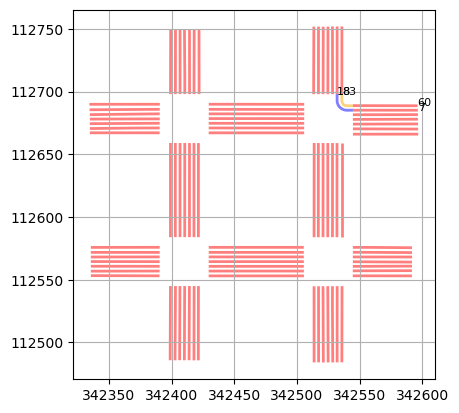

In [380]:
endpoint_0 = boundary_df.geometry[148].coords[-1]
endpoint_1 = boundary_df.geometry[149].coords[-1]
startpoint_0 = boundary_df.geometry[148].coords[0]
startpoint_1 = boundary_df.geometry[149].coords[0]


for i in range(0, 84, 1):
    boundary = boundary_df.geometry[i]
    boundary_2 = boundary_df.geometry[i+1]
    
    points = list(boundary.coords[:]) + list(boundary_2.coords[::-1])
    polygon = Polygon(points)
    plot_line(boundary, color='red', alpha=0.5, add_points=False)  # random color
    #plot_line(boundary_2, color='green', alpha=0.5, add_points=False)  # random color
    if boundary_df.geometry[148].intersects(boundary):
        if shapely.Point(endpoint_0).intersects(boundary):
            print(i, "touching 148 at endpoint 0")


        if shapely.Point(startpoint_0).intersects(boundary):
            print(i, "touching 148 at startpoint 0")


        plt.text(boundary.coords[0][0], boundary.coords[0][1], str(i), fontsize=8)
    if boundary_df.geometry[149].intersects(boundary):
        if shapely.Point(endpoint_1).intersects(boundary):
            print(i, "touching 149 at endpoint 1")


        if shapely.Point(startpoint_1).intersects(boundary):
            print(i, "touching 149 at startpoint 1")


        plt.text(boundary.coords[0][0], boundary.coords[0][1], str(i), fontsize=8)

plot_line(boundary_df.geometry[148], color='blue', alpha=0.5, add_points=False)  # random color
plot_line(boundary_df.geometry[149], color='orange', alpha=0.5, add_points=False)  # random color



In [ ]:



U_main_lane_boundaries = {0: (60, 7, -1), 1: (7, 27, -1), 2: (27, 30, -1), 3: (12, 30, 1), 4: (8, 12, -1), 5: (79, 8, -1), 6: (61, 20, -1), 7: (20, 58, -1), 8: (58, 33, -1), 9: (6, 33, 1), 10: (0, 6, -1), 11: (76, 0, -1), 12: (77, 16, -1), 13: (16, 25, -1), 14: (25, 36, 1), 15: (4, 36, -1), 16: (10, 4, -1), 17: (62, 10, -1), 18: (63, 14, -1), 19: (14, 26, -1), 20: (26, 31, -1), 21: (9, 31, 1), 22: (28, 9, -1), 23: (81, 28, -1), 24: (83, 18, -1), 25: (18, 21, -1), 26: (21, 32, 1), 27: (2, 32, -1), 28: (5, 2, -1), 29: (64, 5, -1), 30: (65, 11, -1), 31: (11, 29, -1), 32: (29, 59, -1), 33: (15, 59, 1), 34: (19, 15, -1), 35: (80, 19, -1), 36: (66, 22, -1), 37: (22, 23, -1), 38: (23, 34, -1), 39: (17, 34, 1), 40: (1, 17, -1), 41: (82, 1, -1), 42: (78, 24, -1), 43: (24, 13, -1), 44: (13, 35, 1), 45: (3, 35, -1), 46: (57, 3, -1), 47: (67, 57, -1), 48: (74, 50 ,-1), 49: (50, 39, -1), 50: (39, 52, 1), 51: (54, 52, -1), 52: (43, 54, -1), 53: (68, 43, -1), 54: (69, 51, -1), 55: (51, 38, -1), 56: (38, 41, -1), 57: (46, 41, 1), 58: (56, 46, -1), 59: (72, 56, -1), 60: (70, 48, -1), 61: (48, 45, -1), 62: (45, 55, -1), 63: (49, 55, 1), 64: (37, 49, -1), 65: (75, 37, -1), 66: (71, 44, -1), 67: (44, 47, -1), 68: (47, 53, -1), 69: (40, 53, 1), 70: (42, 40, -1), 71: (73, 42, -1)}
    







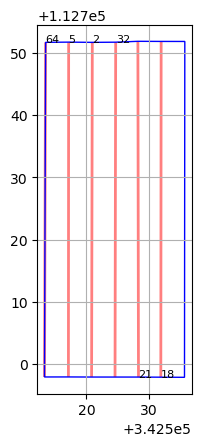

In [403]:
road = road_df.geometry[4]

for key, boundary in boundary_df.iterrows():
    if key > 71:
        continue
    boundary_polygon = boundary.geometry
    if boundary_polygon.intersects(road):
        plot_line(boundary_polygon, color='red', alpha=0.5, add_points=False)
        plt.text(boundary_polygon.coords[0][0], boundary_polygon.coords[0][1], str(key), fontsize=8)
    
plot_polygon(road, edgecolor='blue', facecolor='none', linewidth=1, add_points=False)

(60, 7, -1)
(7, 27, -1)
(27, 30, -1)
(12, 30, 1)
(8, 12, -1)
(79, 8, -1)
(61, 20, -1)
(20, 58, -1)
(58, 33, -1)
(6, 33, 1)
(0, 6, -1)
(76, 0, -1)
(77, 16, -1)
(16, 25, -1)
(25, 36, 1)
(4, 36, -1)
(10, 4, -1)
(62, 10, -1)
(63, 14, -1)
(14, 26, -1)
(26, 31, -1)
(9, 31, 1)
(28, 9, -1)
(81, 28, -1)
(83, 18, -1)
(18, 21, -1)
(21, 32, 1)
(2, 32, -1)
(5, 2, -1)
(64, 5, 1)
(65, 11, -1)
(11, 29, -1)
(29, 59, -1)
(15, 59, 1)
(19, 15, -1)
(80, 19, -1)
(66, 22, -1)
(22, 23, -1)
(23, 34, -1)
(17, 34, 1)
(1, 17, -1)
(82, 1, -1)
(78, 24, -1)
(24, 13, -1)
(13, 35, 1)
(3, 35, -1)
(57, 3, -1)
(67, 57, -1)
(74, 50, -1)
(50, 39, -1)
(39, 52, 1)
(54, 52, -1)
(43, 54, -1)
(68, 43, -1)
(69, 51, -1)
(51, 38, -1)
(38, 41, -1)
(46, 41, 1)
(56, 46, -1)
(72, 56, -1)
(70, 48, -1)
(48, 45, -1)
(45, 55, -1)
(49, 55, 1)
(37, 49, -1)
(75, 37, -1)
(71, 44, -1)
(44, 47, -1)
(47, 53, -1)
(40, 53, 1)
(42, 40, -1)
(73, 42, -1)


Text(342517.1351133374, 112751.74414000683, '65')

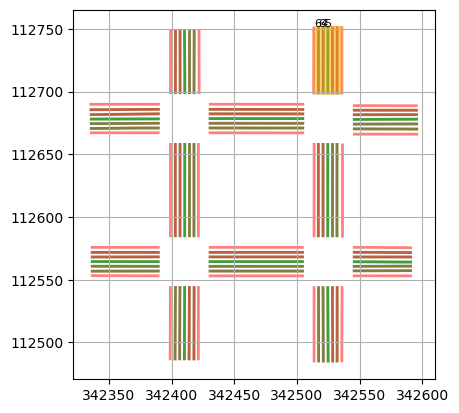

In [ ]:


for key, boundary in U_main_lane_boundaries.items():
    plot_line(boundary_df.geometry[boundary[0]], color='red', alpha=0.5, add_points=False)  # random color
    plot_line(boundary_df.geometry[boundary[1]], color='green', alpha=0.5, add_points=False)  # random color
    
plot_polygon(road, color='orange', alpha=0.5, add_points=False)  # random color
plt.text(boundary_df.geometry[64].coords[0][0], boundary_df.geometry[64].coords[0][1], str(64), fontsize=8)
plt.text(boundary_df.geometry[5].coords[0][0], boundary_df.geometry[5].coords[0][1], str(65), fontsize=8)
    

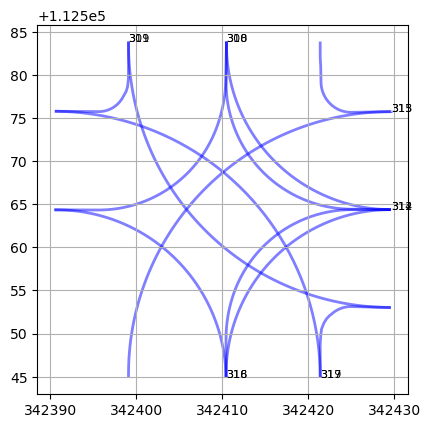

In [348]:


for i, row in boundary_df.iterrows():
    if 307 < i < 320:
        boundary = row.geometry
        plot_line(boundary, color='blue', alpha=0.5, add_points=False)  # random color
        plt.text(boundary.coords[0][0], boundary.coords[0][1], str(i), fontsize=8)


    



In [89]:
shapely.equals(boundary_df.geometry[91], boundary_df.geometry[94])

False

In [86]:
boundary_df.geometry[91].coords.xy

(array('d', [667094.6045101413, 667094.5961794744, 667094.5829424899, 667094.5693548898, 667094.5554166982, 667094.5411279465, 667094.5264886506, 667094.511498844, 667094.4961585449, 667094.4804677896, 667094.4644265999, 667094.448035006, 667094.431293041, 667094.4142007297, 667094.3967581085, 667094.3789652046, 667094.3608220537, 667094.3423286877, 667094.3234851407, 667094.3042494528, 667094.2842544898, 667094.2639632928, 667094.2439344502, 667094.2242750935, 667094.2049852588, 667094.1860649856, 667094.1675143056, 667094.1493332519, 667094.1315218563, 667094.1140801562, 667094.0970081823, 667094.0803059624, 667094.0639735332, 667094.0480109149, 667094.0324181456, 667094.0171952446, 667094.0023422418, 667093.9878591691, 667093.973746047, 667093.9600029017, 667093.9466297551, 667093.933626632, 667093.9210678125, 667093.9199476402, 667093.9078954883, 667093.8958573396, 667093.8838191868, 667093.8717810338, 667093.8597428817, 667093.8477047347, 667093.8356665799, 667093.8236284289, 6670

In [88]:
boundary_df.geometry[94].coords.xy

(array('d', [667093.4396425178, 667093.4381303943, 667093.4353589234, 667093.4363087345, 667093.4410579979, 667093.4496063266, 667093.4615124181, 667093.474490823, 667093.4865601852, 667093.4985983343, 667093.5106364863, 667093.5226746368, 667093.534712791, 667093.5467509418, 667093.5587890936, 667093.5708272442, 667093.5828653978, 667093.5949035505, 667093.6069417002, 667093.6189798506, 667093.6310180016, 667093.6430561541, 667093.6550943054, 667093.6671324577, 667093.6791706089, 667093.6912087607, 667093.7032469141, 667093.7152850643, 667093.7273232148, 667093.739361369, 667093.7513995179, 667093.7634376694, 667093.7754758241, 667093.7875139763, 667093.7995521245, 667093.811590278, 667093.8236284289, 667093.8356665799, 667093.8477047347, 667093.8597428817, 667093.8717810338, 667093.8838191868, 667093.8958573396, 667093.9078954883, 667093.9199476402, 667093.9210678125, 667093.933626632, 667093.9466297551, 667093.9600029017, 667093.973746047, 667093.9878591691, 667094.0023422418, 66709

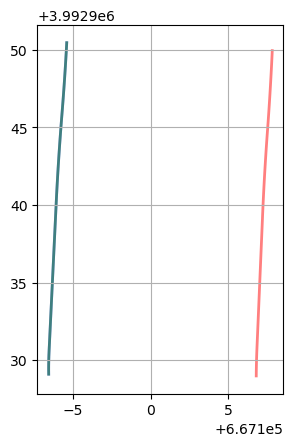

In [83]:
plot_line(boundary_df.geometry[90], color='red', alpha=0.5, add_points=False)
plot_line(boundary_df.geometry[91], color='blue', alpha=0.5, add_points=False)

plot_line(boundary_df.geometry[94], color='green', alpha=0.5, add_points=False)

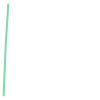

In [78]:
boundary_df.geometry[90]

In [160]:
a = [(1,2,3), (4,5,6), (7,8,9)]
# append all tuples
a = [item for sublist in a for item in sublist]
#
a


[1, 2, 3, 4, 5, 6, 7, 8, 9]

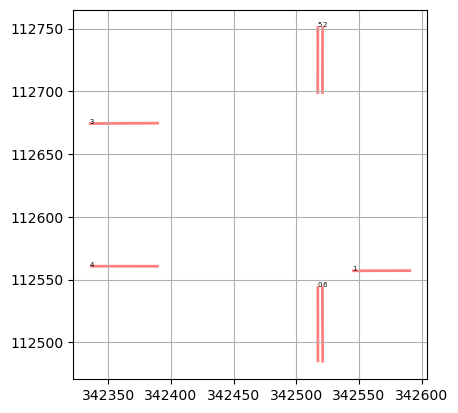

In [153]:
j = 84

for i, row in boundary_df.iterrows():
    boundary_polygon = row.geometry
    previous_lanes = []
    next_lanes = []

    if i < 7:
        plot_line(boundary_polygon, color='red', alpha=0.5, add_points=False)
        plt.text(boundary_polygon.coords[0][0], boundary_polygon.coords[0][1], str(i), fontsize=5)
        
        
    #elif 500 >=i >= 490:
    #    plot_line(boundary_polygon, color='blue', alpha=0.5, add_points=False)
    #    intersections = 0
    #    overlaps = 0
        '''
        for lane in main_lanes:
            start_point = shapely.Point(boundary_polygon.coords[0])
            end_point = shapely.Point(boundary_polygon.coords[-1])
            if start_point.intersects(lane):
                #plot_line(lane, color='black', alpha=0.5, add_points=False)
                previous_lanes.append(lane)
                
            if end_point.intersects(lane):
                #plot_line(lane, color='purple', alpha=0.5, add_points=False)
                next_lanes.append(lane)
        assert len(previous_lanes) == len(next_lanes) == 1
        '''
        
        #for boundary in connecting_boundaries:
        #    if shapely.equals(boundary_polygon, boundary):
        #        overlaps += 1
        #        plot_line(boundary, color='green', alpha=0.5, add_points=False)
        
        #print(overlaps)

In [14]:
boundary_0 = boundary_df.geometry[6]
boundary_1 = boundary_df.geometry[2]
boundary_2 = boundary_df.geometry[8]

In [15]:

lane_poly = shapely.Polygon(list(boundary_0.coords) + list(boundary_1.coords[::-1]))

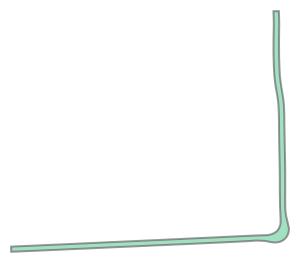

In [16]:
lane_poly

In [17]:
from rulebook_benchmark.roads import Network, Lane, MultiLinePlaceholder, ElementOrientation

/Users/ekin/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


In [18]:
lane_object = Lane(lane_poly, ElementOrientation(lane_poly), "lane_0", None, MultiLinePlaceholder(boundary_0), MultiLinePlaceholder(boundary_1))

In [24]:
tuple([lane_object])

(<rulebook_benchmark.roads.Lane at 0x103003910>,)

In [25]:
network = Network({lane_object.uid: lane_object}, {}, (lane_object,), {}, {}, {})

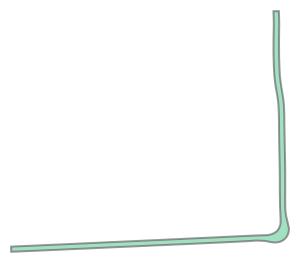

In [21]:
network._rtree.geometries[0]

In [ ]:
lane_poly.exterior.coords.xy

(array('d', [667113.484859361, 667116.7721423478, 667119.2124591622, 667123.0496591319, 667127.8604882503, 667130.8436404362, 667142.00032602, 667149.38959968, 667153.213436174, 667155.7417265036, 667158.4499148459, 667162.1708903704, 667166.1584298892, 667167.4670176673, 667169.0358235448, 667171.0441999484, 667174.7227355386, 667177.5560694104, 667182.483164649, 667185.5865311546, 667191.7647572837, 667197.9969313352, 667199.2351132813, 667202.6167578864, 667207.6537339955, 667210.7909394997, 667214.3763462005, 667219.2425016073, 667224.9870022128, 667236.1072112315, 667246.8172449406, 667262.7482155709, 667269.9896408797, 667278.9689741195, 667282.8958108326, 667287.943563253, 667291.5629729236, 667297.3874085122, 667300.5568447979, 667305.5742252897, 667317.2726203244, 667332.2276195367, 667344.9463853977, 667354.512150163, 667356.4592525037, 667357.7184450319, 667359.1071124936, 667360.4349949743, 667361.8413775396, 667362.6943636085, 667363.4459249668, 667364.1524796627, 667365.5

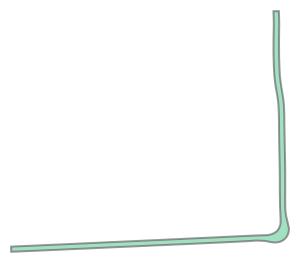

In [26]:
network.laneAt((667116.7721423478, 3992932.1154364846)).polygon

In [ ]:
network.laneAt((0, 0, 0))

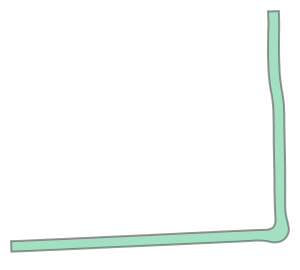

In [ ]:
road

In [ ]:
len(boundary_df) - len(boundary_df[:18])

108

In [ ]:
line1 = boundary_df.geometry[11]
line2 = boundary_df.geometry[7]

In [ ]:
len(line2.coords)
len(line1.coords)

12

In [ ]:
list(line1.coords) + list(line2.coords)

[(667157.1479394881, 3993113.0565209505),
 (667151.8341414974, 3993118.297081568),
 (667132.2362106727, 3993137.9028064907),
 (667131.8712634643, 3993138.2786359293),
 (667131.3551281884, 3993138.7419624804),
 (667130.508811356, 3993139.4382348354),
 (667129.4317622306, 3993140.345432234),
 (667127.2326375714, 3993142.1031250074),
 (667123.0086265969, 3993145.4676678795),
 (667122.6914409456, 3993145.7055249256),
 (667113.8333862387, 3993152.8184382273),
 (667112.3028276521, 3993154.0749442424),
 (667103.9411025206, 3993143.8779462455),
 (667106.9327036372, 3993141.407531309),
 (667120.4711183857, 3993130.405323864),
 (667122.6780575847, 3993128.5926211844),
 (667131.0762068196, 3993119.8581488486),
 (667140.0194868175, 3993111.051368332),
 (667146.115116123, 3993105.0473888796),
 (667146.5957476869, 3993104.5760918213),
 (667148.6543666467, 3993102.5770474942)]

In [ ]:
poly3 = shapely.Polygon(list(line1.coords) + list(line2.coords))
poly3.exterior.contains(line1)

True

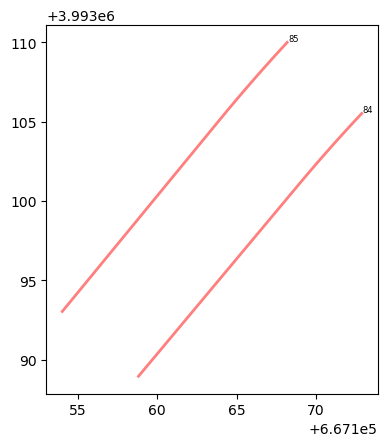

In [ ]:
for i, row in boundary_df.iterrows():
    if 86 > i > 83 :
        plot_line(row.geometry, color='red', alpha=0.5, add_points=False)
        plt.text(row.geometry.coords[0][0], row.geometry.coords[0][1], str(i), fontsize=6)
        plt.grid(False)

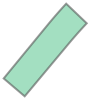

In [ ]:
line1 = boundary_df.geometry[85]
line2 = boundary_df.geometry[84]

shapely.Polygon(list(line2.coords) + list(line1.coords)[::-1])

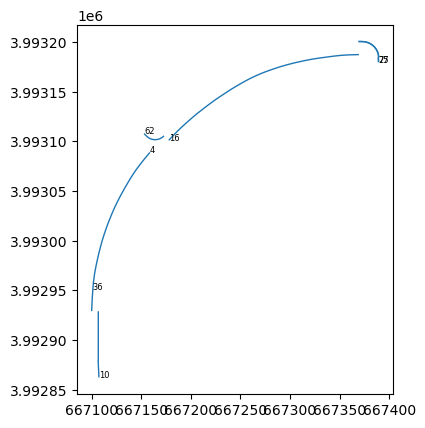

In [ ]:
#plot each boundary in boundary_df with label
for i, row in boundary_df.iterrows():
    
    if i == 4 or i == 10 or i == 62 or i == 36 or i == 25 or i == 16 or i == 77:
        plot_line(row.geometry, linewidth=1, add_points=False)
        plt.text(row.geometry.coords[0][0], row.geometry.coords[0][1], str(i), fontsize=6)
        # no grid
        plt.grid(False)

    